C:\Users\Rohan\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


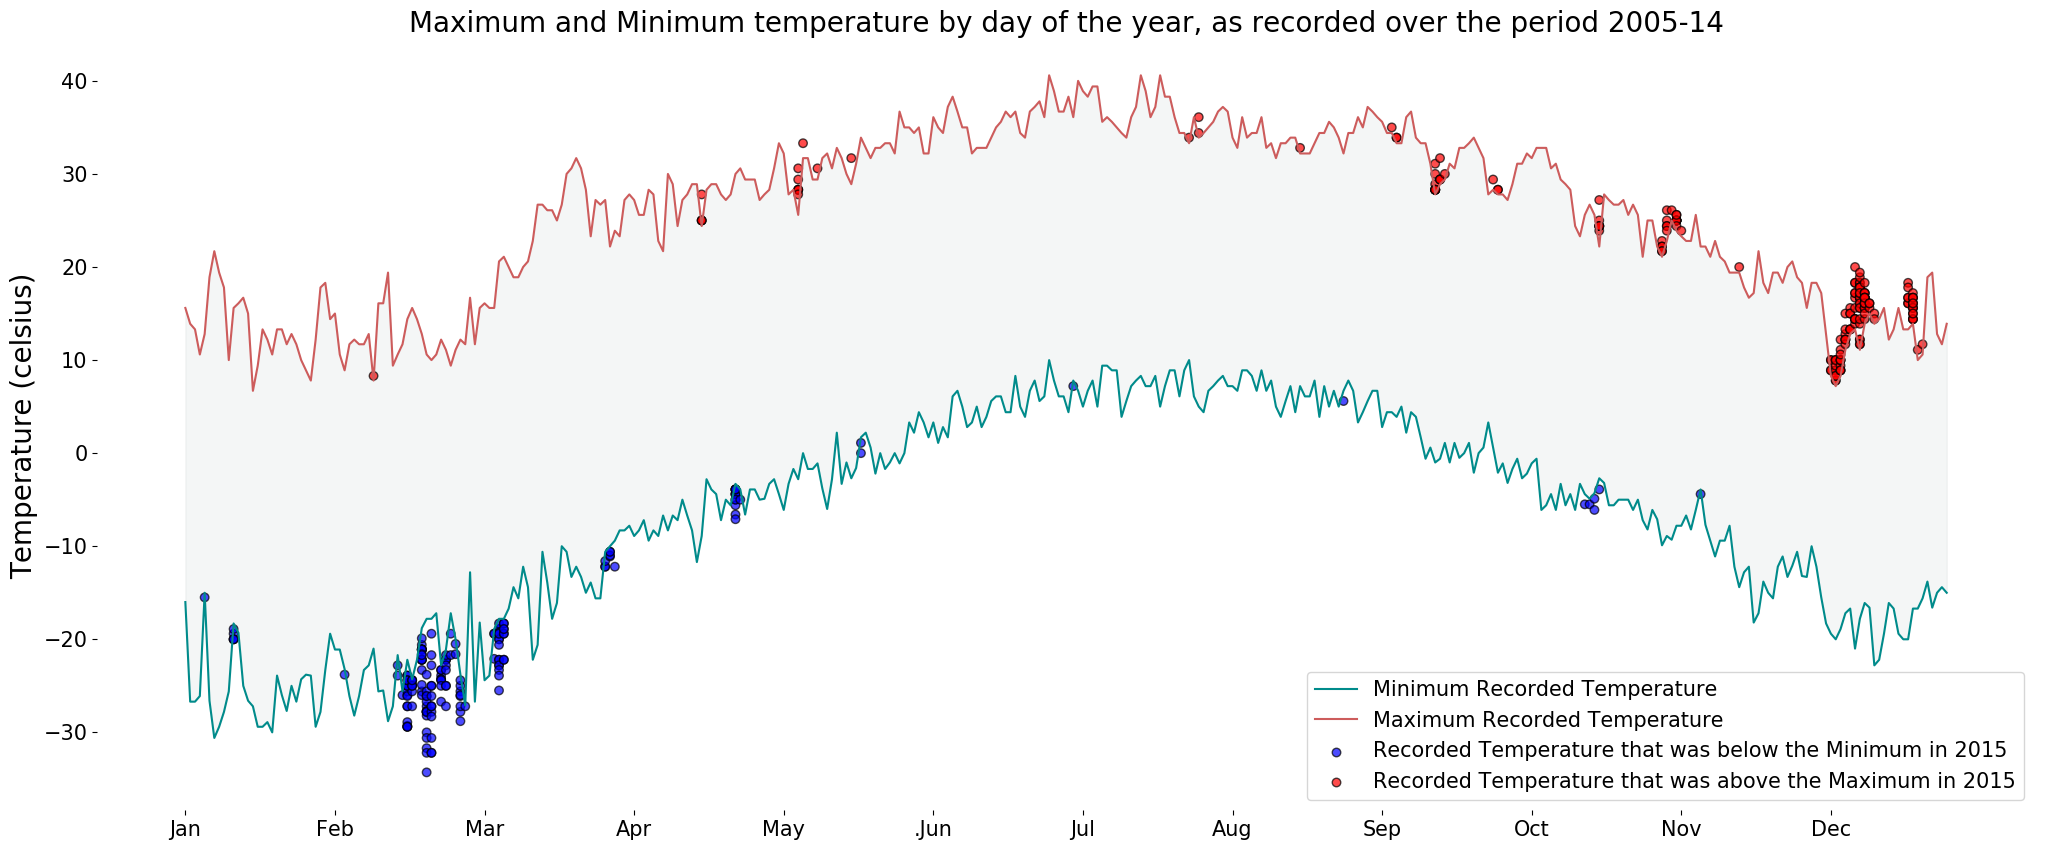

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#plt.rcParams.update(plt.rcParamsDefault)

#--------------------------------------------------------------------------------------------------------------------

#Section 1: Data Cleaning

info=pd.read_csv('Plotdata2.csv')
data=info.copy()

#Create a new column in the dataframe with the days and month only (year excluded).
data['Day'] = data['Date'].str[5:]

#Create another dataframe with 2015 data removed
data_2014=data[data['Date'].str[:4]!='2015']

#Separate out the minimum and maximum reported datapoints in two dataframes.
data_min=data_2014[data_2014['Element']=='TMIN']
data_max=data_2014[data_2014['Element']=='TMAX']


#Create a series called 'min_plot'. This series contains the minimum temperature value for each day, with the day being the index.
data1_min=data_min.groupby('Day')
d_min={}
for i in data1_min:
    d_min[i[0]]=min(i[1]['Data_Value'])

min_plot=pd.Series(d_min,name='Temp')


#Do the same thing for maximum temperature
data1_max=data_max.groupby('Day')
d_max={}
for i in data1_max:
    d_max[i[0]]=max(i[1]['Data_Value'])

max_plot=pd.Series(d_max,name='Temp')

#The series min_plot and max_plot will be used to draw line plots of minimum and maximum temperature

#Now to create the scatterplot of extreme 2015 values.

#Create a single dataframe with the series min_plot and max_plot.
#The dataframe has day values as index and contains one column with minimum temperature value for the day, and one column with maximum temperature value.
min_df=pd.DataFrame(min_plot)
max_df=pd.DataFrame(max_plot)
temp_df=pd.merge(min_df,max_df,how='outer',left_index=True,right_index=True)
temp_df.columns=['Min','Max']


#From the raw data (in the 'data' dataframe), create a new dataframe with just 2015 values.
data_2015 = data[data['Date'].str[:4]=='2015']

#Merge the 2015 dataframe with the temp_df dataframe.
#The goal is to have the 2015 temperature values side by side with the maximum and minimum temperature values all in one dataframe.
data_2015_df = pd.merge(data_2015,temp_df,left_on='Day',right_index=True).sort_values('Day')

#Filter out those values where the 2015 data values is either below the extreme value or above the extreme value.
#data_2015_extreme_plot will be used to plot the final extreme value scatter plot
data_2015_minimum = data_2015_df[(data_2015_df['Data_Value']<data_2015_df['Min'])]
data_2015_maximum = data_2015_df[(data_2015_df['Data_Value']>data_2015_df['Max'])]

data_2015_minimum_plot = data_2015_minimum.set_index('Day')['Data_Value']
data_2015_maximum_plot = data_2015_maximum.set_index('Day')['Data_Value']

#--------------------------------------------------------------------------------------------------------------------

#Section 2: Data Plotting

plt.style.use('seaborn-muted')

plt.plot(min_plot.index,[i/10 for i in min_plot],color='darkcyan',alpha=1,label='Minimum Recorded Temperature')
plt.plot(max_plot.index,[i/10 for i in max_plot],color='indianred',alpha=1,label='Maximum Recorded Temperature')

ax = plt.subplot()

#plt.fill_between(min_plot.index,[i/10 for i in min_plot],[i/10 for i in max_plot],facecolor='white',hatch='.',edgecolor='gray',alpha=0.3)

plt.fill_between(min_plot.index,[i/10 for i in min_plot],[i/10 for i in max_plot],color='darkslategray',alpha=0.05)

for i in ax.spines.values():
    i.set_visible(False)

plt.locator_params(axis='x', nbins=12)


plt.scatter(data_2015_minimum_plot.index,[i/10 for i in data_2015_minimum_plot],color='blue',marker='.',alpha=0.7,edgecolor='black',s=[150 for i in range(len(data_2015_minimum_plot.index))],label='Recorded Temperature that was below the Minimum in 2015')
plt.scatter(data_2015_maximum_plot.index,[i/10 for i in data_2015_maximum_plot],color='red',marker='.',alpha=0.7,edgecolor='black',s=[150 for i in range(len(data_2015_minimum_plot.index))],label='Recorded Temperature that was above the Maximum in 2015')

plt.title('Maximum and Minimum temperature by day of the year, as recorded over the period 2005-14',fontsize=20)

plt.ylabel('Temperature (celsius)', fontsize=20)

months=['Jan','Feb','Mar','Apr','May','.Jun','Jul','Aug','Sep','Oct','Nov','Dec']       
        

ax.set_xticklabels(months, fontsize = 15)

plt.yticks(fontsize=15)

plt.legend(fontsize=15)

size = plt.rcParams["figure.figsize"]
size[0] = 25
size[1] = 10

plt.savefig('Weather Data.png')